In [1]:
# results에서 불러오기
import os

pathlist = os.listdir('./results')


In [2]:
path_weather = [dirs for dirs in pathlist if "weather" in dirs]
path_weather

["weather_192_96_iTransformer_custom_MS_ft192_sl48_ll96_pl1024_dm8_nh4_el1_dl1024_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_192_96_iTransformer_TCN_custom_MS_ft192_sl48_ll96_pl1024_dm8_nh3_el1_dl1024_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_custom_M_ft336_sl48_ll336_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_TCN_custom_M_ft336_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_TCN_custom_M_ft336_sl48_ll336_pl256_dm8_nh3_el1_dl256_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_iTransformer_TCN_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_noTCN_iTransformer_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_rework_iTransformer_TCN_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_pr

In [4]:
import numpy as np

load_files = ['metrics.npy', 'metrics_last.npy', 'pred.npy', 'true.npy']

file_path = './results/' + path_weather[-2] + '/'

pred_obj = np.load(file_path + 'pred.npy')
true_obj = np.load(file_path + 'true.npy')

In [5]:
pred_obj.shape, true_obj.shape # 시계열 96, 22차원, 10444 시도

((10444, 96, 21), (10444, 96, 21))

In [6]:
import matplotlib.pyplot as plt

In [7]:
# utils 불러오기
from utils.metrics import metric, REC_CORR, SMAE, RATIO_IRR

In [8]:
# 각 변수별 상관관계 파악
np.corrcoef(pred_obj[0,:,:].T).shape, np.corrcoef(true_obj[0,:,:].T).shape

C:\Users\Yohan\anaconda3\envs\tcitransformer\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Yohan\anaconda3\envs\tcitransformer\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


((21, 21), (21, 21))

METRICS 1th var:: MAE- 0.31910404562950134 MSE 0.16070909798145294 CORR -0.4427389496165683 SMAE -0.29724010825157166 IRR(3) 0.0
METRICS 2th var:: MAE- 0.16810019314289093 MSE 0.03373393043875694 CORR 0.979945241763751 SMAE -0.12910522520542145 IRR(3) 0.0
METRICS 3th var:: MAE- 0.12881140410900116 MSE 0.026912575587630272 CORR 0.9415339050453555 SMAE -0.02724463678896427 IRR(3) 0.03125
METRICS 4th var:: MAE- 0.22198204696178436 MSE 0.06232075020670891 CORR -0.3803758084540153 SMAE -0.10523515939712524 IRR(3) 0.0
METRICS 5th var:: MAE- 0.39788755774497986 MSE 0.21807853877544403 CORR 0.8576163218089515 SMAE -0.2971762716770172 IRR(3) 0.0
METRICS 6th var:: MAE- 0.05429377034306526 MSE 0.004563252907246351 CORR 0.9558616922661497 SMAE -0.030871450901031494 IRR(3) 0.010416666666666666
METRICS 7th var:: MAE- 0.20172424614429474 MSE 0.04641738533973694 CORR -0.1271788669132813 SMAE -0.13848929107189178 IRR(3) 0.0
METRICS 8th var:: MAE- 0.1196664348244667 MSE 0.022699618712067604 CORR 0.90030

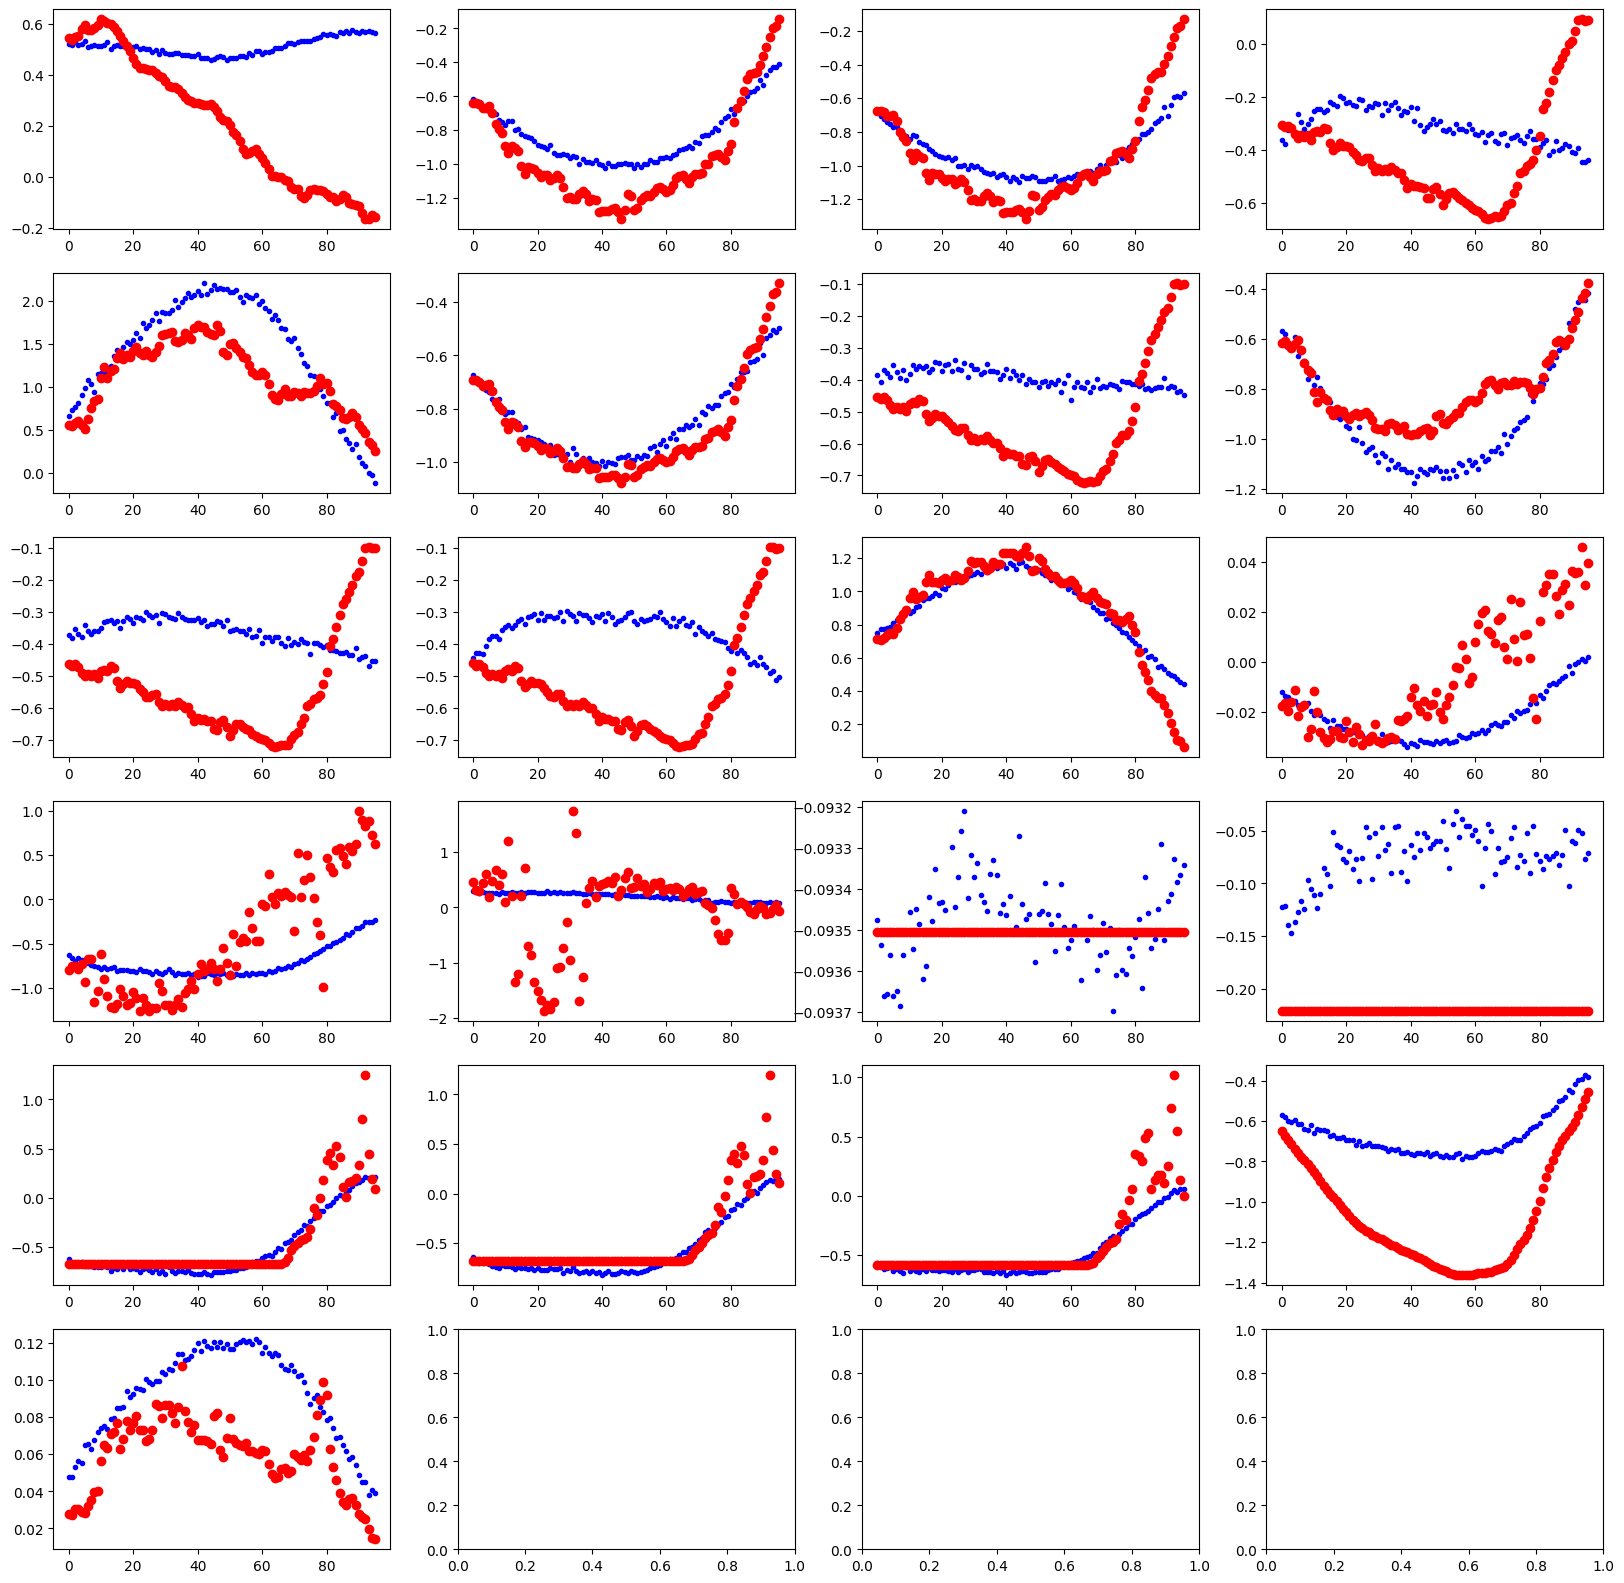

In [9]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 0

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 21:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

METRICS 1th var:: MAE- 0.3080010414123535 MSE 0.109951913356781 CORR 0.9323101320615086 SMAE -0.3080010414123535 IRR(3) 0.0
METRICS 2th var:: MAE- 0.2634787857532501 MSE 0.10752392560243607 CORR 0.9315974239005667 SMAE 0.2230549305677414 IRR(3) 0.0
METRICS 3th var:: MAE- 0.2408781498670578 MSE 0.08918062597513199 CORR 0.9189790809686235 SMAE 0.14772677421569824 IRR(3) 0.0
METRICS 4th var:: MAE- 0.5059814453125 MSE 0.36703014373779297 CORR -0.5936129906227425 SMAE 0.4903273582458496 IRR(3) 0.0
METRICS 5th var:: MAE- 0.45174750685691833 MSE 0.2898300588130951 CORR 0.9092533459956069 SMAE -0.44679322838783264 IRR(3) 0.0
METRICS 6th var:: MAE- 0.28058508038520813 MSE 0.12721697986125946 CORR 0.887972959700134 SMAE 0.2665139138698578 IRR(3) 0.0
METRICS 7th var:: MAE- 0.3223167955875397 MSE 0.15835298597812653 CORR 0.7658031366382494 SMAE 0.30365946888923645 IRR(3) 0.0
METRICS 8th var:: MAE- 0.20038338005542755 MSE 0.05939649045467377 CORR 0.8783347674758982 SMAE 0.11339399218559265 IRR(3) 0

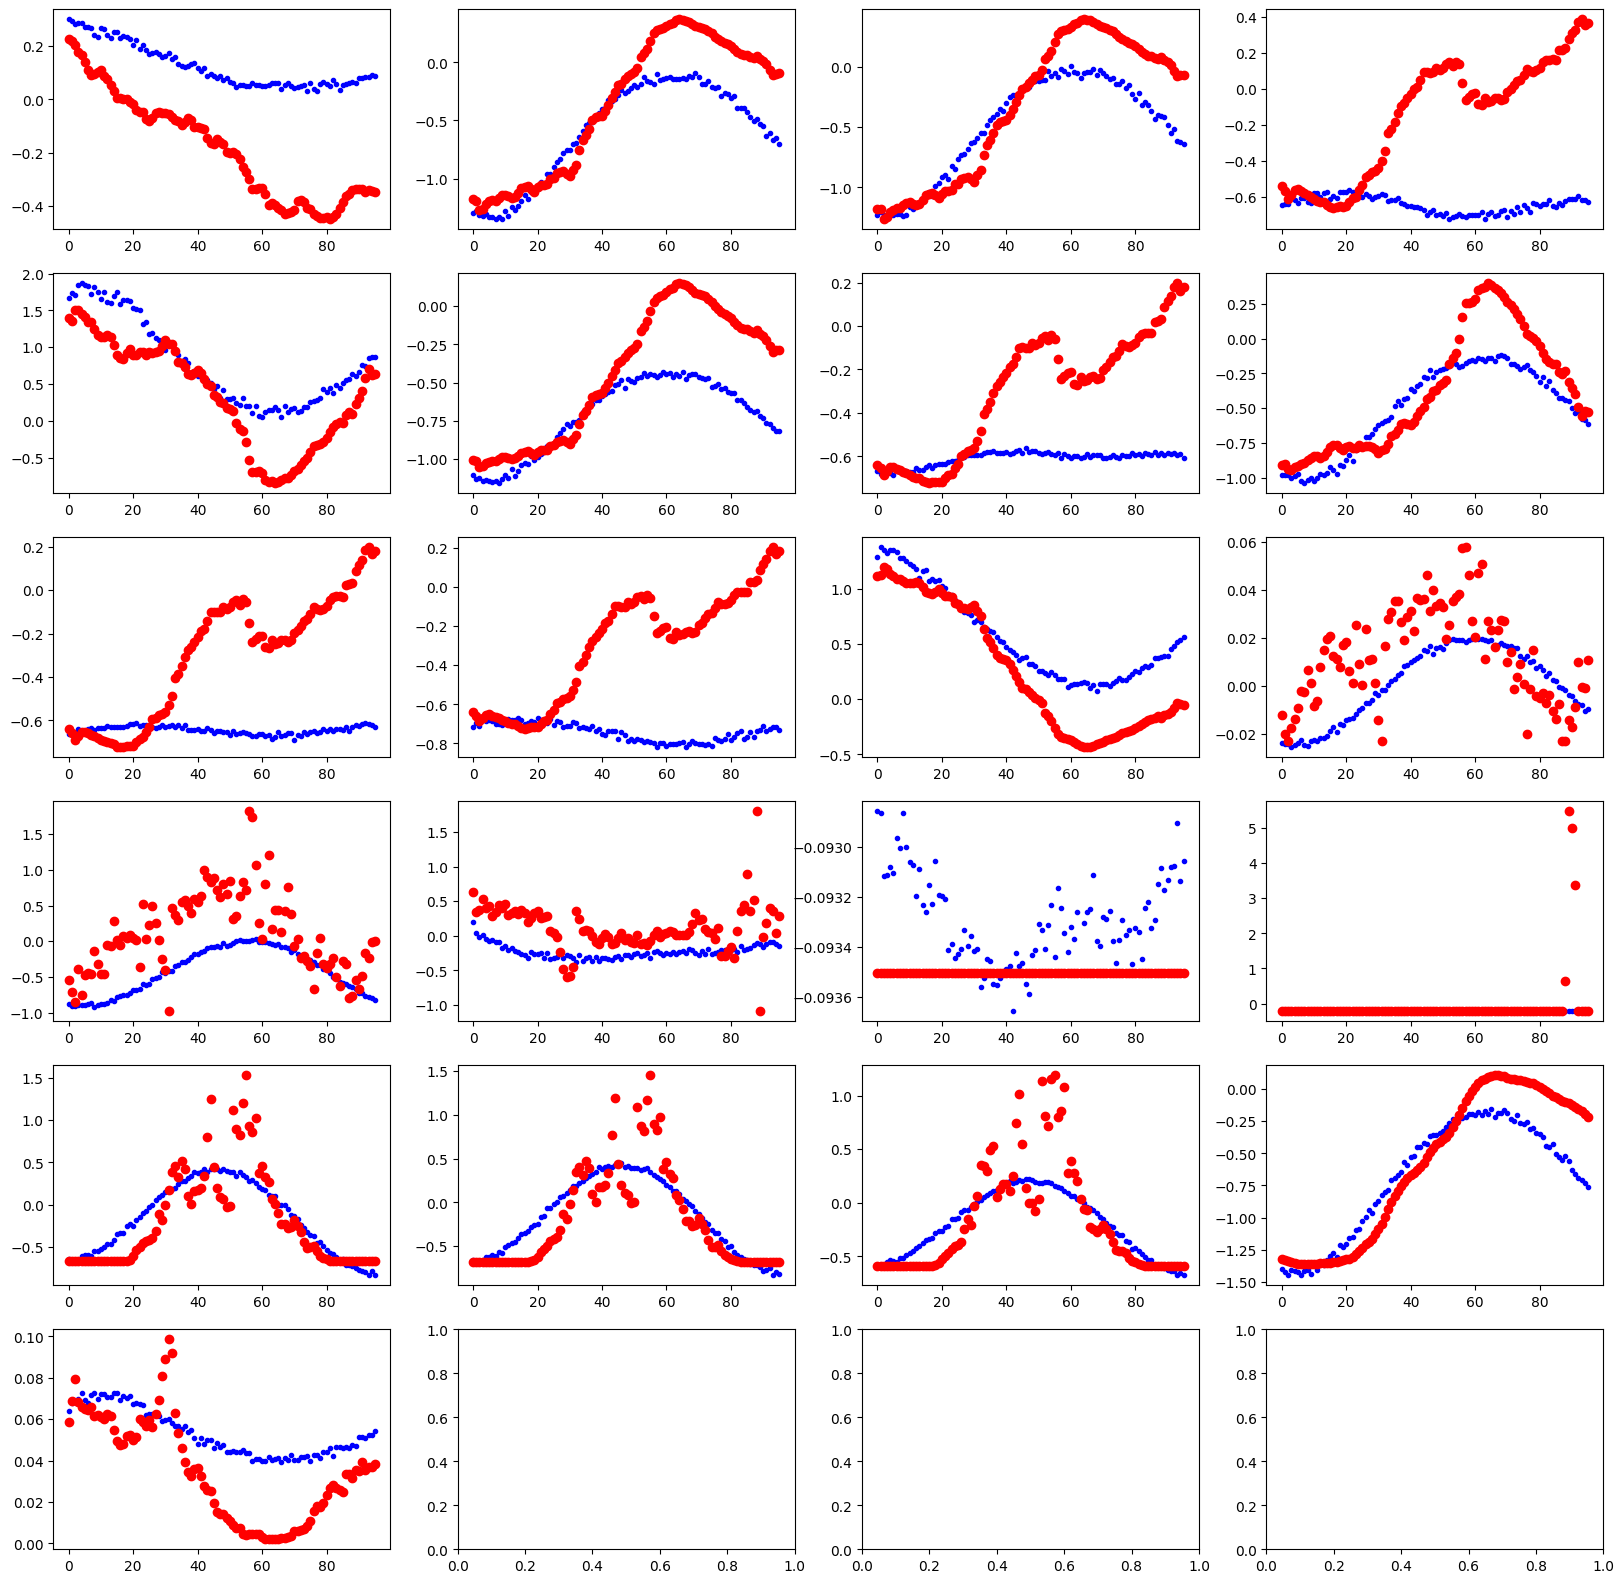

In [10]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 48

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 21:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

METRICS 1th var:: MAE- 0.09010684490203857 MSE 0.012268508784472942 CORR 0.6126807906631456 SMAE 0.057566236704587936 IRR(3) 0.0
METRICS 2th var:: MAE- 0.20276205241680145 MSE 0.0785362645983696 CORR 0.816007304563516 SMAE 0.187416672706604 IRR(3) 0.03125
METRICS 3th var:: MAE- 0.14457805454730988 MSE 0.03877272829413414 CORR 0.8258241164299017 SMAE 0.09439051151275635 IRR(3) 0.0625
METRICS 4th var:: MAE- 0.28030964732170105 MSE 0.09442595392465591 CORR -0.643998428143047 SMAE 0.003184543689712882 IRR(3) 0.0
METRICS 5th var:: MAE- 0.4402236044406891 MSE 0.28600338101387024 CORR 0.817493035370043 SMAE -0.3053797781467438 IRR(3) 0.0
METRICS 6th var:: MAE- 0.13255520164966583 MSE 0.02874053828418255 CORR 0.8377508017243979 SMAE 0.10472843796014786 IRR(3) 0.0
METRICS 7th var:: MAE- 0.24057523906230927 MSE 0.06934893876314163 CORR -0.5504938731236161 SMAE 0.03241527080535889 IRR(3) 0.0
METRICS 8th var:: MAE- 0.20465297996997833 MSE 0.0652734711766243 CORR 0.8350564169303801 SMAE 0.103799253

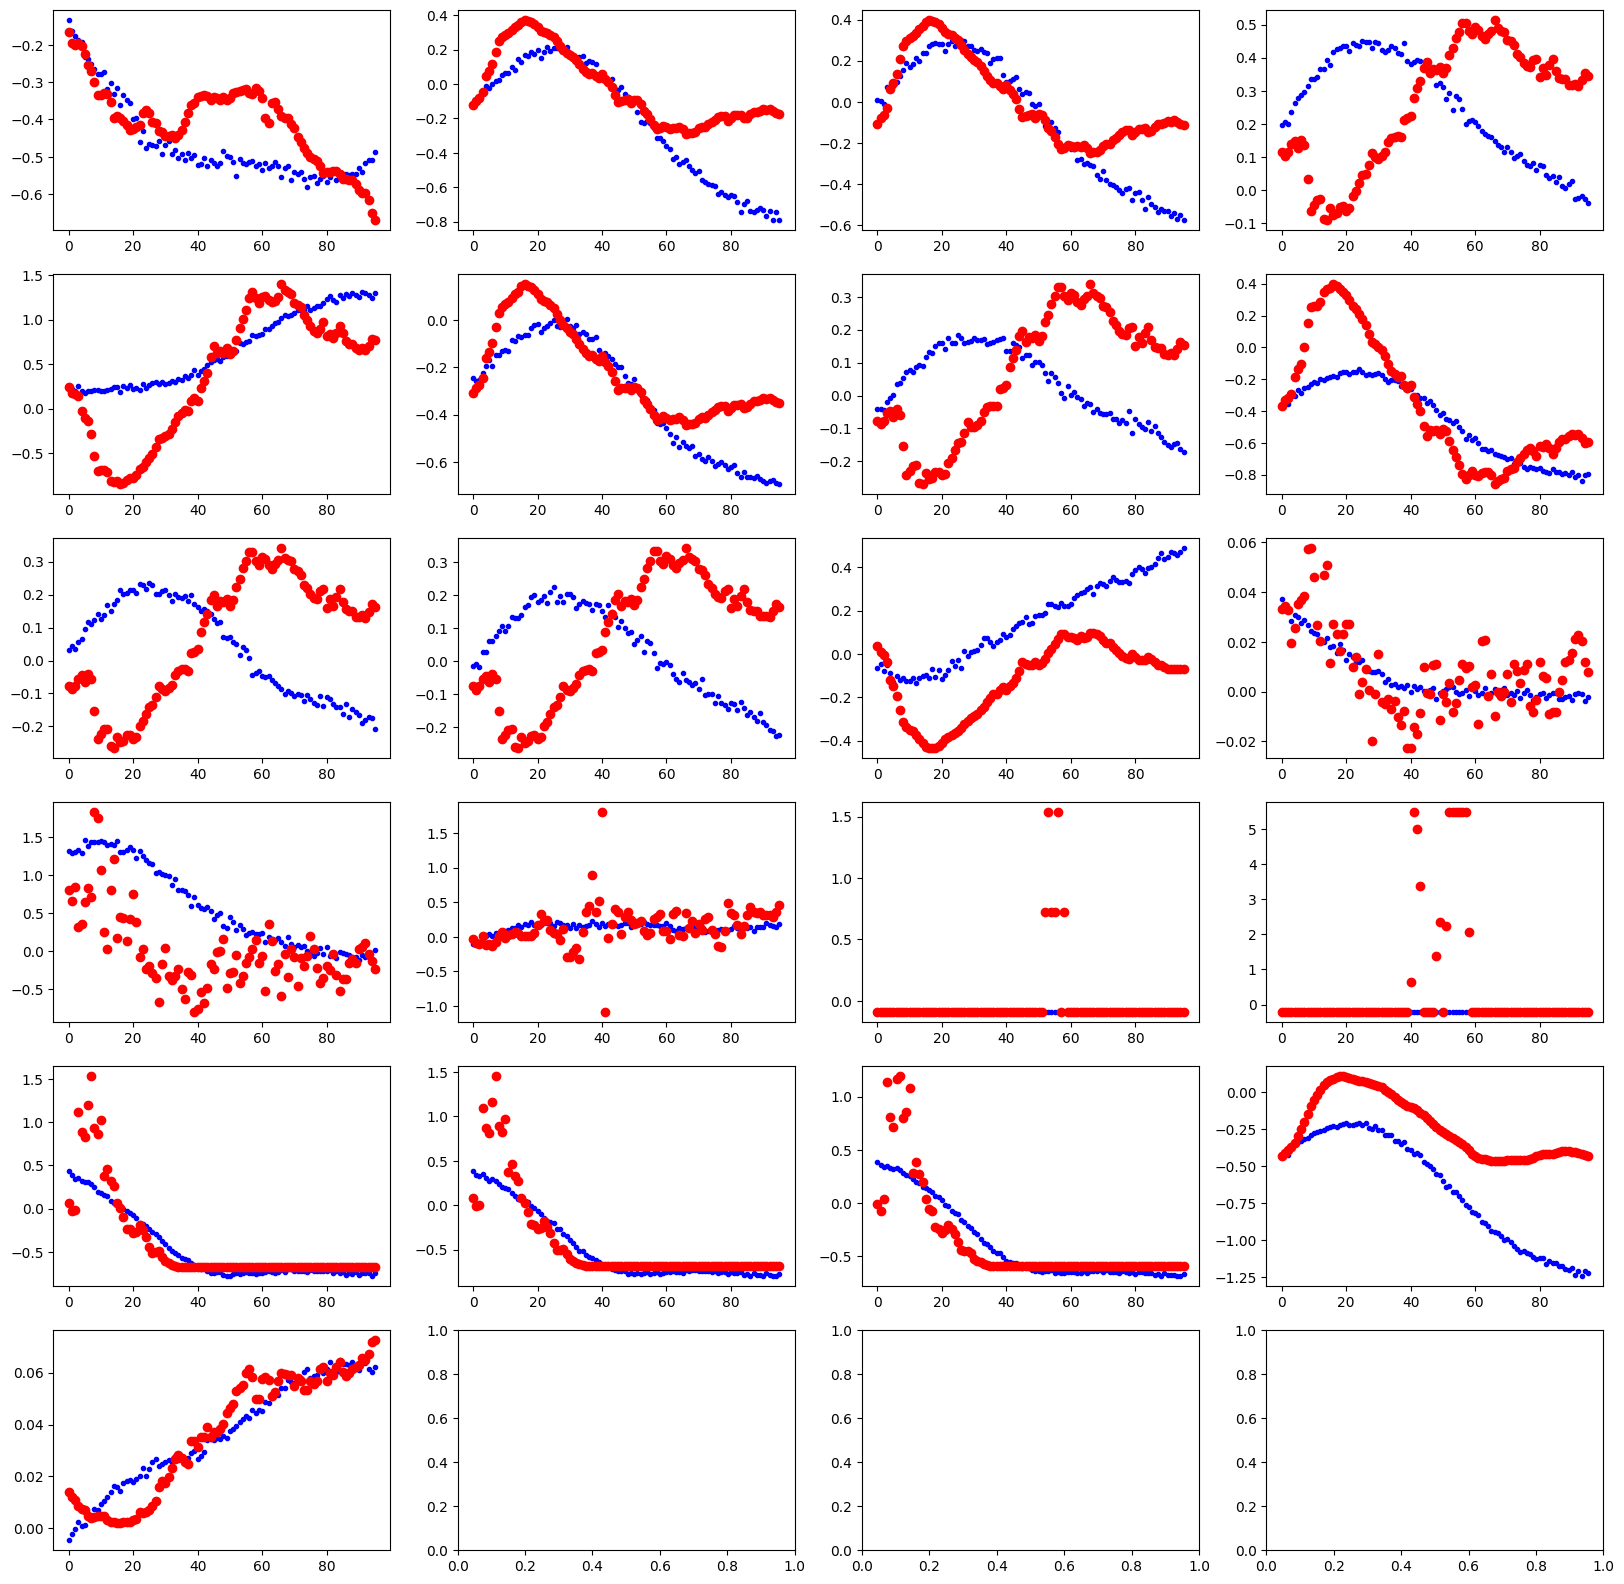

In [11]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 96

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 21:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

In [12]:
true_obj[0, 0, :]

array([ 0.5465991 , -0.6398643 , -0.67572546, -0.30697462,  0.5619792 ,
       -0.6935343 , -0.45367682, -0.6148713 , -0.46277624, -0.46122378,
        0.71155715, -0.01760897, -0.7938599 ,  0.4520802 , -0.09350552,
       -0.22105041, -0.67276675, -0.6794928 , -0.58829564, -0.6482482 ,
        0.02798661], dtype=float32)

In [14]:
# 체크하기 # 시계열 true[s, t, v] = true[s', t' ,v] if s+t = s'+t'
cnt = 0 
for v in range(21):
    for j in range(96):
        for k in range(j):
            if true_obj[0, j, v] != true_obj[k, j-k, v]:
                cnt +=1
print(cnt)

0


In [18]:
# stdev rate 비교, 퍼센타일, 중간값 비교
std_rate_list = []
q3q1_list = []
for c in range(len(pred_obj)):
    std_rate_part = []
    q3q1_list_part = []
    for d in range(21):
        std_rate = np.std(pred_obj[c, :, d])/np.std(true_obj[c, :, d]) if np.std(true_obj[c, :, d]) > 1e-8 else 1e10
        std_rate_part.append(std_rate)
        q3q1_rate = (np.percentile(pred_obj[c, :, d], 75)-np.percentile(pred_obj[c, :, d], 25))/(np.percentile(true_obj[c, :, d], 75)-np.percentile(true_obj[c, :, d], 25)) \
        if (np.percentile(true_obj[c, :, d], 75)-np.percentile(true_obj[c, :, d], 25)) >1e-8 else 1e10
        q3q1_list_part.append(q3q1_rate)
    std_rate_list.append(std_rate_part)
    q3q1_list.append(q3q1_list_part)

std_array = np.array(std_rate_list)
q3q1_array = np.array(q3q1_list)

std_array, q3q1_array

(array([[0.1308606 , 0.57474357, 0.49686927, ..., 0.60656369, 0.40186483,
         1.23141396],
        [0.13635162, 0.60085833, 0.50472254, ..., 0.62027359, 0.42304516,
         1.26382327],
        [0.13859436, 0.60173643, 0.50386137, ..., 0.61041689, 0.43254974,
         1.35468864],
        ...,
        [0.57480937, 0.98016644, 0.79597545, ..., 0.0708835 , 1.03265512,
         0.09598046],
        [0.57601172, 0.97213835, 0.80407816, ..., 0.05712901, 1.0308491 ,
         0.09206861],
        [0.4678461 , 0.87116259, 0.7008186 , ..., 0.04936184, 1.04798555,
         0.06014949]]),
 array([[0.10179362, 0.69635634, 0.71547857, ..., 1.54829032, 0.29936959,
         1.59743326],
        [0.11559455, 0.77878184, 0.72228421, ..., 1.43742148, 0.30882783,
         1.6077505 ],
        [0.11885804, 0.75924159, 0.7188908 , ..., 1.37099884, 0.2973447 ,
         1.772763  ],
        ...,
        [0.56118444, 1.80647885, 1.60956712, ..., 0.11032754, 2.58413635,
         0.07302809],
        [0.6

In [19]:
# 비율 측정
np.sum(std_array>=1)/std_array.size

0.29905071948350387

In [20]:
np.sum(q3q1_array>=1)/q3q1_array.size

0.39995622914044976

In [49]:
cond1 = std_array<1 
cond2 = q3q1_array>=1
condext0 = std_array < 1e8
condext = q3q1_array < 1e8
condvas = q3q1_array < 1e-5
condvas0 = std_array < 1e-5


np.sum(cond1 & cond2 & condext), cond1.size, np.sum(1-cond1 & 1-cond2 & condext)

(17652, 219324, 2702)

In [39]:
np.sum(1-condext), np.sum(1-condext0)

(29149, 198)

In [41]:
1-condext0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
std_array.shape

(10444, 21)

In [42]:
for u in range(10044):
    for v in range(21):
        if 1-condext0[u,v]==1:
            print(u,v)

1013 15
1014 15
1016 15
1018 15
1021 15
1022 15
1024 15
1025 15
1026 15
1027 15
1028 15
1029 15
1030 15
1031 15
1032 15
1033 15
1034 15
1035 15
1036 15
1037 15
1038 15
1039 15
1041 15
1042 15
1043 15
1044 15
1045 15
1046 15
1047 15
1048 15
1052 15
1055 15
1057 15
1058 15
1060 15
1061 15
1062 15
7329 4
7330 4
7331 4
7332 4
7333 4
7334 4
7335 4
7336 4
7337 4
7338 4
7339 4
7340 4
7341 4
7342 4
7343 4
7344 4
7345 4
7346 4
7347 4
7348 4
7349 4
7350 4
7351 4
7352 4
7353 4
7354 4
7355 4
7356 4
7357 4
7358 4
7359 4
7360 4
7361 4
7362 4
7363 4
7364 4
7365 4
7366 4
7367 4
7368 4
7369 4
7370 4
7371 4
7372 4
7373 4
7374 4
7375 4
7376 4
7377 4
7378 4
7379 4
7380 4
7381 4
7382 4
7383 4
7384 4
7385 4
7386 4
7387 4
7388 4
7389 4
7390 4
7391 4
7392 4
7393 4
7394 4
7395 4
7396 4
7397 4
7398 4
7399 4
7400 4
7401 4
7402 4
7403 4
7404 4
7405 4
7406 4
7407 4
7408 4
7409 4
7410 4
7411 4
7412 4
7413 4
7414 4
7415 4
7416 4
7417 4
7418 4
7419 4
7420 4
7421 4
7422 4
7423 4
7424 4
7425 4
7426 4
7427 4
7428 4
7429

In [52]:
# 사분편차가 사라지는 부분, 표준편차가 사라지는 부분
for t in range(21):
    print(t, np.corrcoef(std_array[:,t], q3q1_array[:,t])[0,1])
    print(t, "Q3-Q1", std_array.shape[0] - np.sum(condext[:,t]), "Stdev", std_array.shape[0] - np.sum(condext0[:,t]))

0 0.8936265387116245
0 Q3-Q1 0 Stdev 0
1 0.8693921191249575
1 Q3-Q1 0 Stdev 0
2 0.8775088751903066
2 Q3-Q1 0 Stdev 0
3 0.8864010627400082
3 Q3-Q1 0 Stdev 0
4 0.5481837824586614
4 Q3-Q1 511 Stdev 159
5 0.8750323698302279
5 Q3-Q1 0 Stdev 0
6 0.8940198371127688
6 Q3-Q1 0 Stdev 0
7 0.2358160410505396
7 Q3-Q1 511 Stdev 0
8 0.8811951566846858
8 Q3-Q1 0 Stdev 0
9 0.8788342086123423
9 Q3-Q1 0 Stdev 0
10 0.9105512297612293
10 Q3-Q1 0 Stdev 0
11 0.9447256694446091
11 Q3-Q1 0 Stdev 0
12 0.931642346471834
12 Q3-Q1 0 Stdev 0
13 0.8222653697349736
13 Q3-Q1 0 Stdev 0
14 0.022784264708230903
14 Q3-Q1 10347 Stdev 0
15 0.05230536497950715
15 Q3-Q1 9688 Stdev 37
16 0.024807218335358767
16 Q3-Q1 2479 Stdev 2
17 0.31904685318536813
17 Q3-Q1 2842 Stdev 0
18 0.3064875053652258
18 Q3-Q1 2771 Stdev 0
19 0.8235135006000195
19 Q3-Q1 0 Stdev 0
20 0.9325869910861828
20 Q3-Q1 0 Stdev 0


In [53]:
# re 데이터 기준으로

file_path = './results/' + path_weather[-1] + '/'

pred_obj1 = np.load(file_path + 'pred.npy')
true_obj1 = np.load(file_path + 'true.npy')

METRICS 1th var:: MAE- 0.00396882975474 MSE 2.2891637854627334e-05 CORR -0.13480042938206785 SMAE 0.003908430691808462 IRR(3) 0.0
METRICS 2th var:: MAE- 0.3653927743434906 MSE 0.2090974599123001 CORR -0.7995186644815943 SMAE -0.35127392411231995 IRR(3) 0.0
METRICS 3th var:: MAE- 0.31501856446266174 MSE 0.12375102192163467 CORR 0.8746808202835061 SMAE -0.3059101402759552 IRR(3) 0.0
METRICS 4th var:: MAE- 0.27198246121406555 MSE 0.09264811873435974 CORR 0.8872458034416556 SMAE -0.24936164915561676 IRR(3) 0.0
METRICS 5th var:: MAE- 0.43085670471191406 MSE 0.24635688960552216 CORR -0.6592109433948196 SMAE -0.4059242308139801 IRR(3) 0.0
METRICS 6th var:: MAE- 0.24246616661548615 MSE 0.10146429389715195 CORR 0.768559944292754 SMAE -0.0919480100274086 IRR(3) 0.020833333333333332
METRICS 7th var:: MAE- 0.19669032096862793 MSE 0.04499471187591553 CORR 0.9205846751167348 SMAE -0.18829305469989777 IRR(3) 0.0
METRICS 8th var:: MAE- 0.27643170952796936 MSE 0.104083351790905 CORR -0.175201158102873 

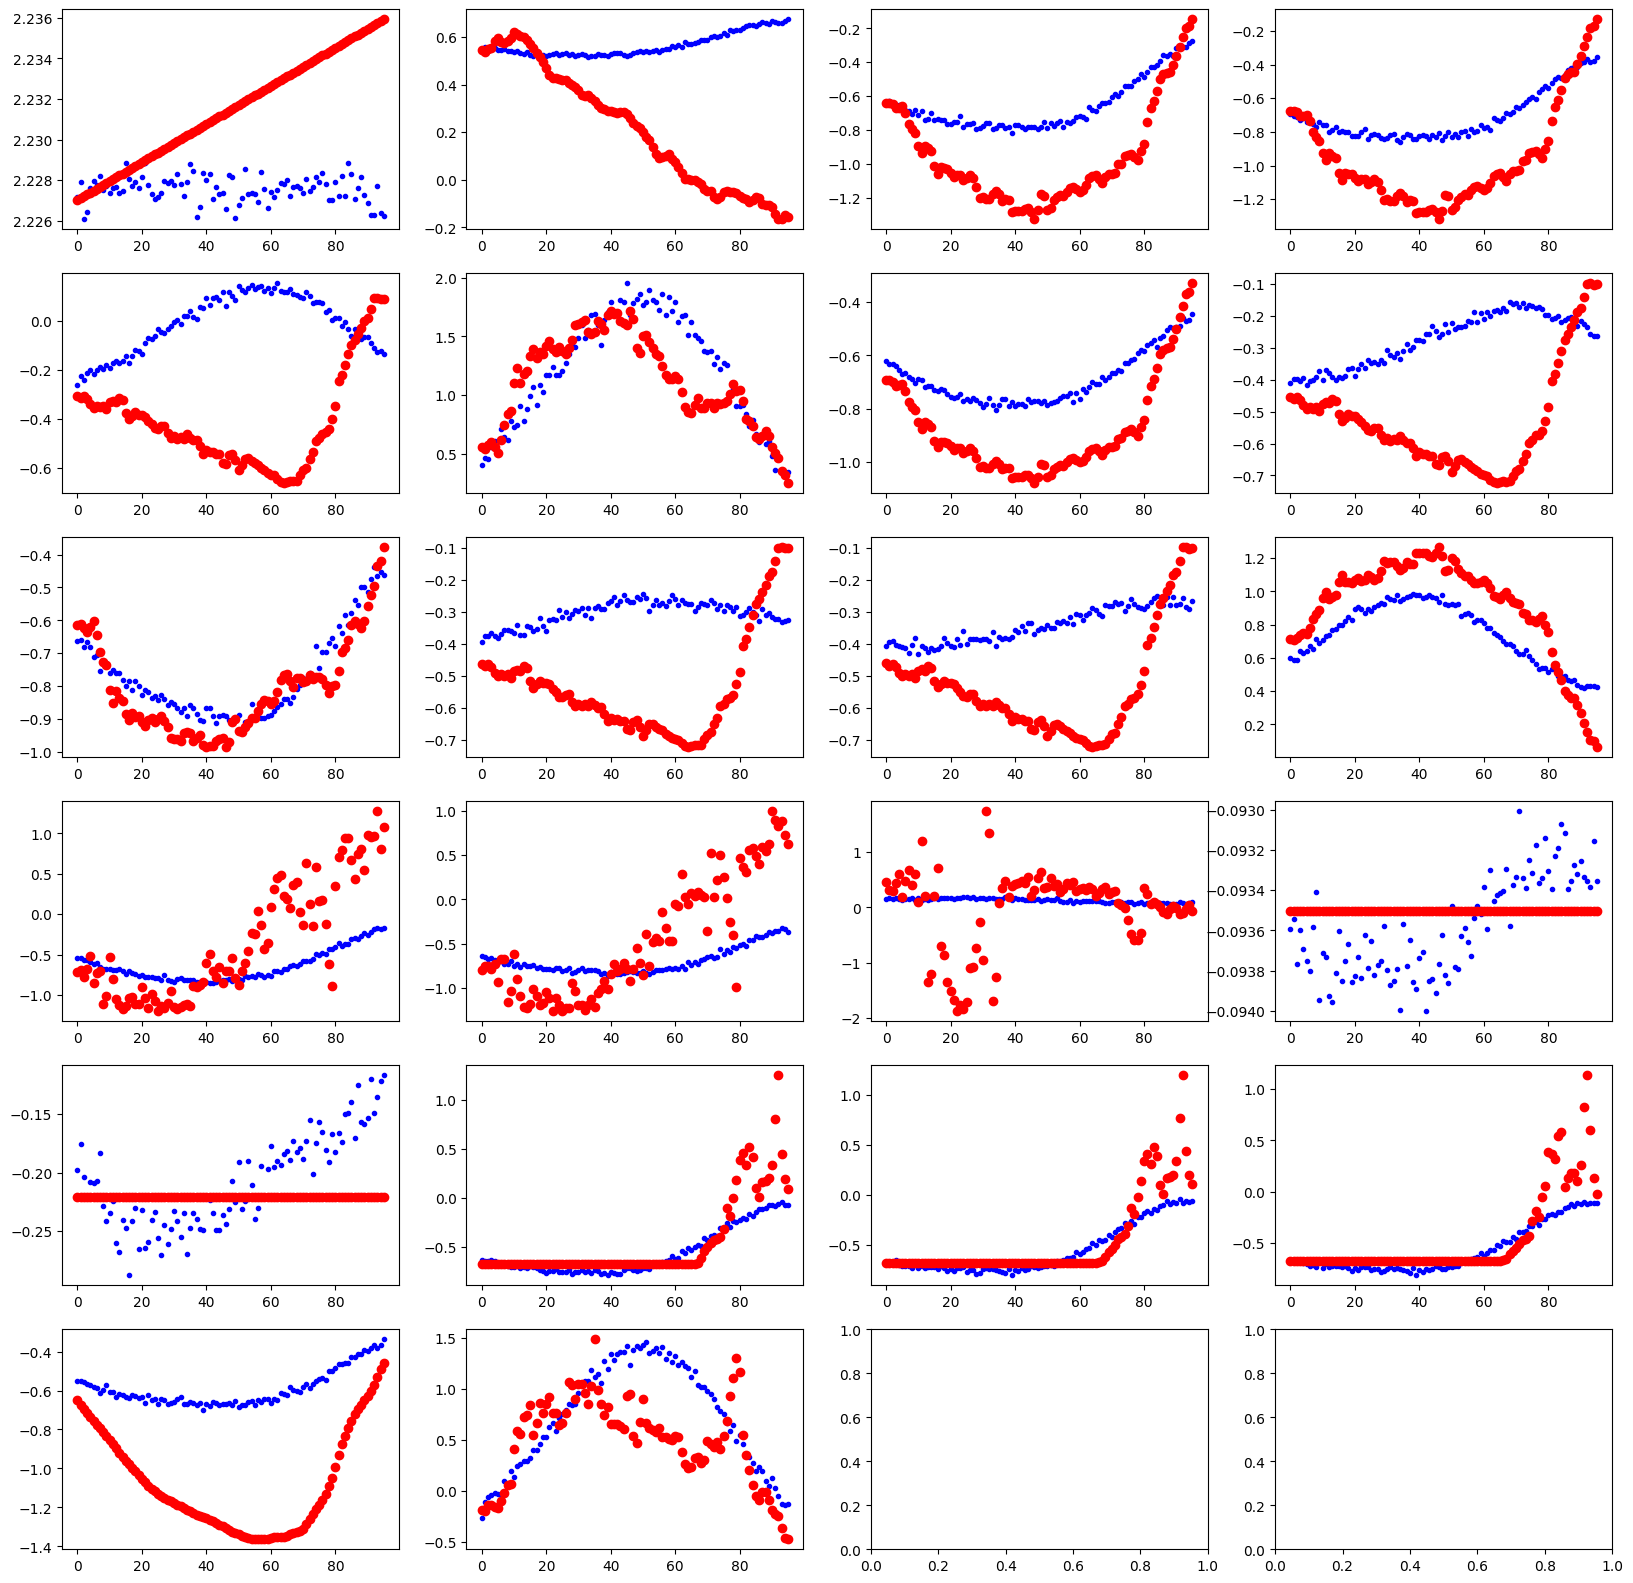

In [55]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 0

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 22:
            x = range(96)
            y1 = pred_obj1[step,:,4*i+j] 
            y2 = true_obj1[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

METRICS 1th var:: MAE- 0.003064659656956792 MSE 1.6291107385768555e-05 CORR 0.21972252140929363 SMAE 0.0030532802920788527 IRR(3) 0.041666666666666664
METRICS 2th var:: MAE- 0.4694538116455078 MSE 0.29437002539634705 CORR -0.80407300302593 SMAE -0.4694538116455078 IRR(3) 0.0
METRICS 3th var:: MAE- 0.2923882305622101 MSE 0.11137548834085464 CORR 0.8398290327657918 SMAE 0.06140775978565216 IRR(3) 0.0
METRICS 4th var:: MAE- 0.26654332876205444 MSE 0.09961557388305664 CORR 0.8911208543225598 SMAE 0.1061599925160408 IRR(3) 0.0
METRICS 5th var:: MAE- 0.4160672128200531 MSE 0.2507932186126709 CORR 0.8124892153863349 SMAE 0.4035774767398834 IRR(3) 0.0
METRICS 6th var:: MAE- 0.36969542503356934 MSE 0.18758969008922577 CORR 0.8097317827464056 SMAE 0.061996400356292725 IRR(3) 0.0
METRICS 7th var:: MAE- 0.24991388618946075 MSE 0.09849081188440323 CORR 0.8163929479672346 SMAE 0.16619820892810822 IRR(3) 0.0
METRICS 8th var:: MAE- 0.2836247980594635 MSE 0.1195804700255394 CORR 0.7308545265043348 SMAE

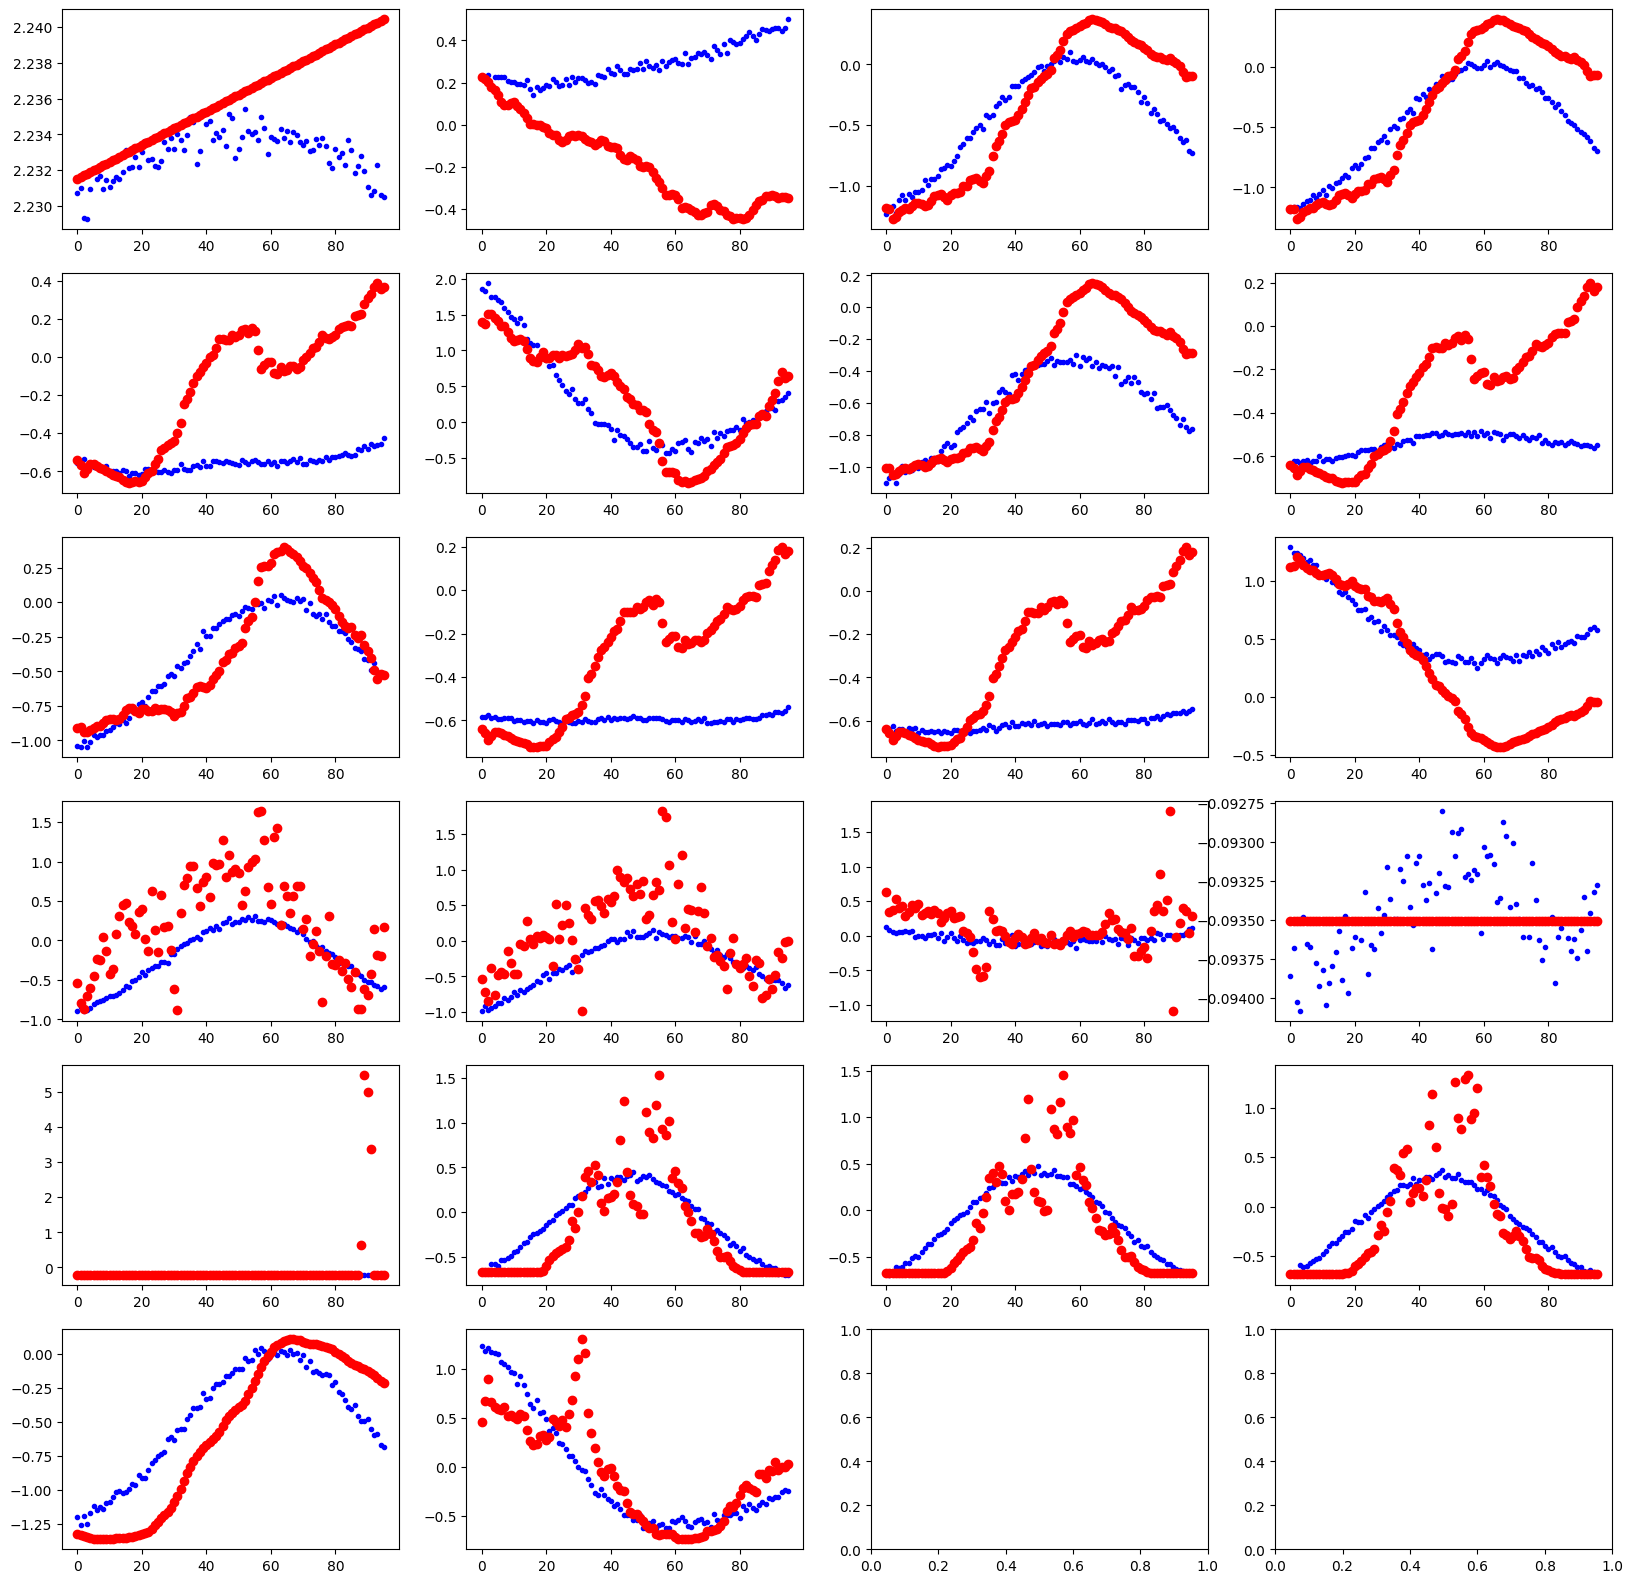

In [56]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 48

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 22:
            x = range(96)
            y1 = pred_obj1[step,:,4*i+j] 
            y2 = true_obj1[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

In [72]:
# stdev rate 비교, 퍼센타일, 중간값 비교
std_rate_list1 = []
q3q1_list1 = []
for c in range(len(pred_obj1)):
    std_rate_part1 = []
    q3q1_list_part1 = []
    for d in range(22):
        std_rate = np.std(pred_obj1[c, :, d])/np.std(true_obj1[c, :, d]) if np.std(true_obj1[c, :, d]) > 1e-8 else 1e10
        std_rate_part1.append(std_rate)
        q3q1_rate = (np.percentile(pred_obj1[c, :, d], 75)-np.percentile(pred_obj1[c, :, d], 25))/(np.percentile(true_obj1[c, :, d], 75)-np.percentile(true_obj1[c, :, d], 25)) \
        if (np.percentile(true_obj1[c, :, d], 75)-np.percentile(true_obj1[c, :, d], 25)) >1e-8 else 1e10
        q3q1_list_part1.append(q3q1_rate)
    std_rate_list1.append(std_rate_part1)
    q3q1_list1.append(q3q1_list_part1)

std_array1 = np.array(std_rate_list1)
q3q1_array1 = np.array(q3q1_list1)

std_array1, q3q1_array1

(array([[0.2429405 , 0.19104502, 0.520383  , ..., 0.55813617, 0.35182518,
         1.22123647],
        [0.24536753, 0.19632535, 0.54710722, ..., 0.57615101, 0.42138681,
         1.17387331],
        [0.24199091, 0.20041555, 0.55007464, ..., 0.58289802, 0.51306564,
         1.16150117],
        ...,
        [0.4428668 , 0.36405063, 0.57609659, ..., 0.04470658, 0.73790783,
         0.30081439],
        [0.36381975, 0.34142849, 0.51651019, ..., 0.03101823, 0.66880488,
         0.36110172],
        [0.32695341, 0.3013328 , 0.49442014, ..., 0.02403803, 0.70753521,
         0.33523381]]),
 array([[0.17553447, 0.15170786, 0.46365473, ..., 1.89267283, 0.23629228,
         1.78821366],
        [0.17473276, 0.15845114, 0.54672682, ..., 1.73688739, 0.26308248,
         1.73306718],
        [0.15867183, 0.16145936, 0.5831781 , ..., 1.66584225, 0.3947578 ,
         1.73349924],
        ...,
        [0.28610751, 0.34947898, 1.20484143, ..., 0.0646694 , 2.18021233,
         0.19172808],
        [0.2

In [73]:
np.sum(std_array1>=1)/std_array1.size , np.sum(q3q1_array1>=1)/q3q1_array1.size

(0.26200341213746037, 0.37456477838515373)

In [76]:
cond3 = std_array1<1 
cond4 = q3q1_array1>=1
condext01 = std_array1 < 1e8
condext1 = q3q1_array1 < 1e8
condvas1 = q3q1_array1 < 1e-5
condvas01 = std_array1 < 1e-5
np.sum(cond3 & cond4 & condext1), cond1.size, np.sum(1-cond3 & 1-cond4 & condext1)

(20129, 219324, 1999)

In [77]:
np.sum(1-condext1), np.sum(1-condext01), 

(29149, 162)

In [79]:
np.sum(condvas1), np.sum(condvas01)

(0, 0)

In [80]:
# 사분편차가 사라지는 부분, 표준편차가 사라지는 부분
for t in range(21):
    print(t, np.corrcoef(std_array1[:,t], q3q1_array1[:,t])[0,1])
    print(t, "Q3-Q1", std_array1.shape[0] - np.sum(condext1[:,t]), "Stdev", std_array1.shape[0] - np.sum(condext01[:,t]))

0 0.9003053511512082
0 Q3-Q1 0 Stdev 0
1 0.9056908220168872
1 Q3-Q1 0 Stdev 0
2 0.8857656917437609
2 Q3-Q1 0 Stdev 0
3 0.8755723769499338
3 Q3-Q1 0 Stdev 0
4 0.8756977698409651
4 Q3-Q1 0 Stdev 0
5 0.5481837822453194
5 Q3-Q1 511 Stdev 159
6 0.8761691046023266
6 Q3-Q1 0 Stdev 0
7 0.8932270097774178
7 Q3-Q1 0 Stdev 0
8 0.22035625747485107
8 Q3-Q1 511 Stdev 0
9 0.8726523441091808
9 Q3-Q1 0 Stdev 0
10 0.8991693067933181
10 Q3-Q1 0 Stdev 0
11 0.8978678852031221
11 Q3-Q1 0 Stdev 0
12 0.9437850461590762
12 Q3-Q1 0 Stdev 0
13 0.9397111381805979
13 Q3-Q1 0 Stdev 0
14 0.8250710249832471
14 Q3-Q1 0 Stdev 0
15 0.026075607283601157
15 Q3-Q1 10347 Stdev 0
16 0.07117010871156393
16 Q3-Q1 9688 Stdev 1
17 0.024807215850326383
17 Q3-Q1 2479 Stdev 2
18 0.3310164561894206
18 Q3-Q1 2842 Stdev 0
19 0.36645789198662904
19 Q3-Q1 2771 Stdev 0
20 0.8400281113024382
20 Q3-Q1 0 Stdev 0


In [82]:
# 예측값이 실제보다 작은 편향.